# <center>ODSC APAC 2023</center><br><center>LLMs and Ontologies  for Precision NERC</center>

In [1]:
import openai
import os

In [2]:
openai.api_key  = os.getenv("OPENAI_API_KEY")

In [3]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

# Does LLMs contain domain knowledge by default? 

<u><b>Note:</b></u><br><br>
We will check if Generative LLMs like ChatGPT is capable of doing domain specific tasks.
<br>We will evaluate chatGPT model on the following healthcare tasks:
* Medical symtpon detection
* Medical abbreviation disambiguation
* Clinical history detection
* Confirming evidence of medical test
* Medical NERC task - ICD code detection

## Example-1: Symptom detection

In [42]:
med_sentiment = "Pt notes that over past 1-2 weeks he's had increased chronic abdominal pain, \
fatigue/weakness,malaise, noted dark appearing urine. Denies fever, chills, vomiting, cp, sob, dizziness, \
syncope, legswelling, bleeding from stool/urine/nose/gums/bruising, diarrhea, or dysuria"

In [43]:
prompt = f"""
For the review text present in sentence delimited by <>.
Please break the sentence into negative and positive symptoms and format the output as a list.

Review text: <{med_sentiment}>
"""
response = get_completion(prompt)
print(response)

Negative symptoms:
- Denies fever
- Denies chills
- Denies vomiting
- Denies chest pain
- Denies shortness of breath
- Denies dizziness
- Denies syncope
- Denies leg swelling
- Denies bleeding from stool/urine/nose/gums/bruising
- Denies diarrhea
- Denies dysuria

Positive symptoms:
- Increased chronic abdominal pain
- Fatigue/weakness
- Malaise
- Noted dark appearing urine


## Example-2: Medical abbreviations

In [60]:
med_abbreviations = "Male pmh copd, chf, htn, hld, dm, current daily smoker who presents today sent in by\
doctor Y for chf exacerbation"

In [73]:
prompt = f"""
For the review text present in sentence delimited by <>.
Identify the medical abbreviations and provide its expansion, format the output as a list.

Review text: <{med_abbreviations}>
"""
response = get_completion(prompt)
print(response)

- pmh: Past Medical History
- copd: Chronic Obstructive Pulmonary Disease
- chf: Congestive Heart Failure
- htn: Hypertension
- hld: Hyperlipidemia
- dm: Diabetes Mellitus


## Example-3: Clinical history

In [92]:
med_abbreviations

'Male pmh copd, chf, htn, hld, dm, current daily smoker who presents today sent in bydoctor Y for chf exacerbation'

In [62]:
prompt = f"""
For the review text present in sentence delimited by <>.
Break the sentence into clinical history and present ailments, format the output as a list.

Review text: <{med_abbreviations}>
"""
response = get_completion(prompt)
print(response)

Clinical history:
- Male
- PMH: COPD, CHF, HTN, HLD, DM
- Current daily smoker

Present ailments:
- CHF exacerbation


## Example-4: Medical test detection

In [7]:
med_test = '68-yrs-old woman with hx of hypertension, hyperlipidemia, pud and worsening osteopenia, \
pcp ordered DEXA scan 3 months ago for which the T-score came - 1.8, which confirms the dx of osteoporosis, \
which is currently managed by bisphosphonate medications'

In [5]:
prompt = f"""
For the review text present in sentence delimited by <>.
Please tell if the patient has done a Bone Mineral Density test.

Review text: <{med_test}>
"""
response = get_completion(prompt)
print(response)

Yes, the patient has done a Bone Mineral Density test (DEXA scan) 3 months ago, which confirmed the diagnosis of osteoporosis.


In [66]:
prompt = f"""
How is BMD test related to dexa scan.
"""
response = get_completion(prompt)
print(response)

BMD (Bone Mineral Density) test is a type of test that measures the amount of minerals, such as calcium, in a specific area of bone. It is commonly used to diagnose osteoporosis or assess the risk of fractures.

Dexa scan, also known as Dual-energy X-ray Absorptiometry, is a specific type of BMD test that uses low-dose X-rays to measure bone density. It is considered the gold standard for diagnosing osteoporosis and is the most commonly used method for assessing bone health.

In summary, BMD test is a broader term that encompasses various methods of measuring bone density, while Dexa scan is a specific type of BMD test that uses X-rays to measure bone density.


## Example-5: NERC - Medical code detection

In [91]:
med_abbreviations

'Male pmh copd, chf, htn, hld, dm, current daily smoker who presents today sent in bydoctor Y for chf exacerbation'

In [64]:
prompt = f"""
For the review text present in sentence delimited by <>.
Infer the ICD-10 codes from sentence and state them with there descriptions.

Review text: <{med_abbreviations}>
"""
response = get_completion(prompt)
print(response)

ICD-10 codes:
1. COPD (Chronic Obstructive Pulmonary Disease) - ICD-10 code: J44.9
   Description: Chronic obstructive pulmonary disease, unspecified

2. CHF (Congestive Heart Failure) - ICD-10 code: I50.9
   Description: Heart failure, unspecified

3. HTN (Hypertension) - ICD-10 code: I10
   Description: Essential (primary) hypertension

4. HLD (Hyperlipidemia) - ICD-10 code: E78.5
   Description: Hyperlipidemia, unspecified

5. DM (Diabetes Mellitus) - ICD-10 code: E11.9
   Description: Type 2 diabetes mellitus without complications


<u><b>Note:</b></u><br><br>
The first 4 tasks were completed with good perfection and even the last NERC one was done almost good. It had a slight error that when both I10 and I50.9 are present then one needs to code I110. <br>Seems like a subtle error, as these cases can be handled by some simple rules in post processing. 

In [250]:
prompt = f"""
What is the description of ICD-10 code I110 and when is it applicable?
"""
response = get_completion(prompt)
print(response)

ICD-10 code I110 refers to "Hypertensive heart disease with heart failure." It is applicable when a patient has been diagnosed with both hypertension (high blood pressure) and heart failure. This code is used to classify and document this specific combination of conditions for medical and billing purposes.


# Does LLMs have sufficient domain knowledge for NERC?

We will now test these Generative LLMs with slightly harder NERC cases

In [75]:
med_usable_codes = 'patient will continue on azithromycin and ceftriaxone iv. we will add some solu-medrol\
80 mg iv every 12 hours. 2. patient appears to be quite cachectic and has apparently lost quite a bit of \
weight. she looks like she could certainly have an occult cancer.'

In [77]:
prompt = f"""
Identify the ICD-10 codes that can be used for medical coding in the sentence delimited with <>, 
format it as a numbered list and mention the words used for obtaining codes

Review text: <{med_usable_codes}>
"""
response = get_completion(prompt)
print(response)

1. Azithromycin - J01FA10
2. Ceftriaxone - J01DD04
3. Solu-medrol - H02AB04
4. Cachectic - R64
5. Weight loss - R63.4
6. Occult cancer - C80.1


<u><b>Note:</b></u><br><br>
Here although we asked for ICD-10 codes, which only covers diagnoses and procedures and does not cover drugs. But here we got ATC (Anatomical Therapeutic Chemical) codes for 3 drugs above. This may not be as per the instructions, but it is still okay as it returned the correct ATC codes.
<br>
<br> The major issue is in quoting <b>C80.1</b>, the code for occult cancer.
<br> If we check the original text the doctor says the patient <i>"looks like she could certainly have an occult cancer"</i>. This means at this point it is uncertain and <b>anything uncertain should not be used for medical coding</b>. Since we explicitly stated to provide codes that can be used for medical coding, so this is an error.

In [94]:
prompt = f"""
For the review sentence delimited with <>, 
identify the uncertain diagnoses mentioned in review text.

Review text: <{med_usable_codes}>
"""
response = get_completion(prompt)
print(response)

The uncertain diagnosis mentioned in the review text is "occult cancer".


<u><b>Note:</b></u><br><br>
<i>The LLM had the knowledge that occult cancer is an uncertain diagnosis, but it could not apply this knowledge while executing the instruction provided.</i>

## Consistency and Precision of NERC task

<u><b>Note:</b></u><br><br>
We earlier took easier scenarios, now we will take more realistic scenarios that occur commonly in real data.

In [6]:
med_diagnosis = '66 y/o M with metastatic pancreatic cancer to liver, pancreatic insuffiency, GERD, chronic \
pain who presents after being referred by Oncologist Dr. X for elevated LFTs today, found on CT abdomen and \
pelvis with evidence of biliary obstruction.'

In [12]:
prompt = f"""
Give ICD-10 codes present in the sentence delimited by <>.

Review text: <{med_diagnosis}>
"""
response = get_completion(prompt)
print(response)

ICD-10 codes present in the sentence are:
- C78.7 (Secondary malignant neoplasm of liver and intrahepatic bile duct)
- K86.1 (Other chronic pancreatitis)
- K21.9 (Gastro-esophageal reflux disease without esophagitis)
- G89.29 (Other chronic pain)
- K83.1 (Obstruction of bile duct)


<u><b>Note:</b></u><br><br>
<b>Consistency:</b><br>
Let's just re-run the same prompt with same medical sentence again and check if the output is consistent.

In [84]:
prompt = f"""
Infer all applicable ICD-10 codes in the sentence delimited by <>.
Give your answer in the form of a list.

Review text: <{med_diagnosis}>
"""

response = get_completion(prompt)
print(response)

- C25.9 - Malignant neoplasm of pancreas, unspecified
- C78.7 - Secondary malignant neoplasm of liver and intrahepatic bile duct
- E74.39 - Other disorders of carbohydrate metabolism, pancreatic
- K21.9 - Gastro-esophageal reflux disease without esophagitis
- G89.29 - Other chronic pain
- K83.1 - Obstruction of bile duct
- R94.5 - Abnormal results of liver function studies


<u><b>Note:</b></u><br>

As we can see for the same tasks we got 5 codes earlier and now we got 7 codes.<br>
So even when running chatGPT at temperature = 0 (least randomness) we don't get consistent answers

In [83]:
prompt = f"""
Infer all applicable ICD-10 codes in the sentence delimited by <>.
Give your answer in the form of a list and also mention the words used it the sentence to obtain ICD-10 codes along with code.

Review text: <{med_diagnosis}>
"""

response = get_completion(prompt)
print(response)

ICD-10 codes:
1. Metastatic pancreatic cancer to liver - C78.7
2. Pancreatic insufficiency - K86.81
3. GERD (Gastroesophageal reflux disease) - K21.9
4. Chronic pain - G89.29
5. Elevated LFTs (Liver function tests) - R94.5
6. Biliary obstruction - K83.1

Words used to obtain ICD-10 codes:
- Metastatic pancreatic cancer to liver
- Pancreatic insufficiency
- GERD
- Chronic pain
- Elevated LFTs
- Biliary obstruction


<u><b>Note:</b></u><br>

Let's compare the accuracy of ICD-10 code prediction by comparing it with ground truth.<br>
We also asked chatGPT to mention the words used for obtaining codes, so that we can verify precisely.

In [87]:
med_diagnosis_formated = '66 y/o M with\x1b[31m metastatic pancreatic\x1b[34m cancer to liver,\x1b[31m pancreatic insuffiency,\x1b[34m GERD,\x1b[31m chronic \
pain\x1b[0m who presents after being referred by Oncologist Dr. X for\x1b[31m elevated LFTs\x1b[0m today, found on CT abdomen and \
pelvis with evidence of\x1b[31m biliary obstruction.\x1b[0m\n'
med_diagnosis_ground_truth = "1.) metastatic pancreatic -\t C25.9: Malignant neoplasm of pancreas, unspecified\n2.) cancer to liver -\t\t C78.7: Secondary malignant neoplasm of liver and intrahepatic bile ducts\n3.) pancreatic insuffiency-\t K86.89: Other specified diseases of pancreas\n4.) GERD -\t\t\t K21.9: Gastro-esophageal reflux disease without esophagitis\n5.) chronic pain -\t\t G89.29: Other chronic pain\n6.) elevated LFTs -\t\t R79.89: Other specified abnormal findings of blood chemistry\n7.) biliary obstruction -\t K83.1: Obstruction of bile duct"

In [88]:
print('Ground truth:\n', med_diagnosis_formated)
print(med_diagnosis_ground_truth)

Ground truth:
 66 y/o M with metastatic pancreatic cancer to liver, pancreatic insuffiency, GERD, chronic pain who presents after being referred by Oncologist Dr. X for elevated LFTs today, found on CT abdomen and pelvis with evidence of biliary obstruction.

1.) metastatic pancreatic -	 C25.9: Malignant neoplasm of pancreas, unspecified
2.) cancer to liver -		 C78.7: Secondary malignant neoplasm of liver and intrahepatic bile ducts
3.) pancreatic insuffiency-	 K86.89: Other specified diseases of pancreas
4.) GERD -			 K21.9: Gastro-esophageal reflux disease without esophagitis
5.) chronic pain -		 G89.29: Other chronic pain
6.) elevated LFTs -		 R79.89: Other specified abnormal findings of blood chemistry
7.) biliary obstruction -	 K83.1: Obstruction of bile duct


<u><b>Note:</b></u><br>

As we can observe from the above ground truth and the model's answer in the cell before the last Note.<br>
Comparing the 6 codes predicted with the 7 grounf truth above, we found:
* 4 TP (True Positives)
* 2 FP (False Positives)
* 3 FN (False Negatives)

This implies we got:<br>
<b>Precision: 67%<br>
Recall: 57%<b>

# LLMs: Context understanding

<u><b>Note:</b></u><br>

<b>Context:</b><br>
We will now check the context understanding capabilities of LLM.<br>
We will purposely ask a topic for which it was not trained upon. This way we will be able to assess its behaviour in all scenarios where either the LLM does not have the right knowledge or it is <b>hallucinating</b> on some partial knowledge.

In [96]:
prompt = f"""
Is Oppenheimer doing better than Barbie?
"""
response = get_completion(prompt)
print(response)

It is not possible to compare Oppenheimer and Barbie directly as they are two completely different entities. Oppenheimer refers to J. Robert Oppenheimer, a renowned physicist and one of the key figures in the development of the atomic bomb. Barbie, on the other hand, is a popular fashion doll. Their areas of influence and impact are entirely different, so it is not appropriate to compare their success or performance.


<u><b>Note:</b></u><br>

Asking a similar question on which it had the training data.<br>
Do check the precision of information provided this time.

In [101]:
prompt = f"""
Did Dark Knight did better than Mamma Mia?
"""
response = get_completion(prompt)
print(response)

Yes, "The Dark Knight" performed better than "Mamma Mia!" at the box office. "The Dark Knight" grossed over $1 billion worldwide, making it one of the highest-grossing films of all time, while "Mamma Mia!" grossed around $615 million worldwide.


In [104]:
prompt = f"""
What role does Christopher Nolan play in Oppenheimer?
"""
response = get_completion(prompt)
print(response)

As of my knowledge cutoff in September 2021, Christopher Nolan is set to direct the upcoming film "Oppenheimer," but he does not have an acting role in the movie. "Oppenheimer" is a biographical drama about J. Robert Oppenheimer, the American physicist who played a significant role in the development of the atomic bomb during World War II.


## In-Context Learning

<u><b>Note:</b></u><br>

We provide a news article as context to LLM and check if it is able to get the correct answer.

In [108]:
news_context = f"""
As per Deadline’s report on 28th July 2023, Barbie has amassed $528.6 million at the worldwide box office as
the numbers grew on Wednesday compared to Tuesday. Apart from the domestic market, the film is enjoying 
superbly in overseas, with $291.4 million coming in so far. With the kind of pace it is witnessing, the mark 
of $600 million is expected to be crossed by the second weekend.

Speaking about Oppenheimer, it has collected $265.1 million at the worldwide box office in the first six 
days. By Friday, the film is expected to hit the $300 million milestone and will again see a spike on 
Saturday and Sunday.
"""

In [107]:
prompt = f"""
Answer the question based on the context provided.
Context: {news_context}

Question: Is Oppenheimer doing better than Barbie?
"""
response = get_completion(prompt)
print(response)

Based on the information provided, Oppenheimer has collected $265.1 million at the worldwide box office in the first six days, while Barbie has amassed $528.6 million at the worldwide box office. Therefore, Barbie is doing better than Oppenheimer.


# Context for LLMs via Ontologies

<u><b>Note:</b></u><br>

<b>Ontologies:</b><br>
We will now create a small Ontology from the same news article.<br>
We will then pass a <b><i>"Graph / Ontology as a context"</i></b> to the LLM.<br>
Since most of the LLMs have token limits so Ontology can provide just the right information to answer the question at hand.

## LangChain for adding context

In [109]:
from langchain.indexes import GraphIndexCreator
from langchain.llms import OpenAI
from langchain.chains import GraphQAChain

In [114]:
import networkx as nx
import matplotlib.pyplot as plt

In [110]:
ontology_creator = GraphIndexCreator(llm=OpenAI(temperature=0))

In [112]:
news_context_graph = ontology_creator.from_text(news_context)
news_context_graph.get_triples()

[('Barbie', '$528.6 million', 'has amassed'),
 ('Barbie', 'superbly in overseas', 'is enjoying'),
 ('Barbie', '$600 million', 'is expected to cross'),
 ('Oppenheimer', '$265.1 million', 'has collected'),
 ('Oppenheimer', '$300 million', 'is expected to hit')]

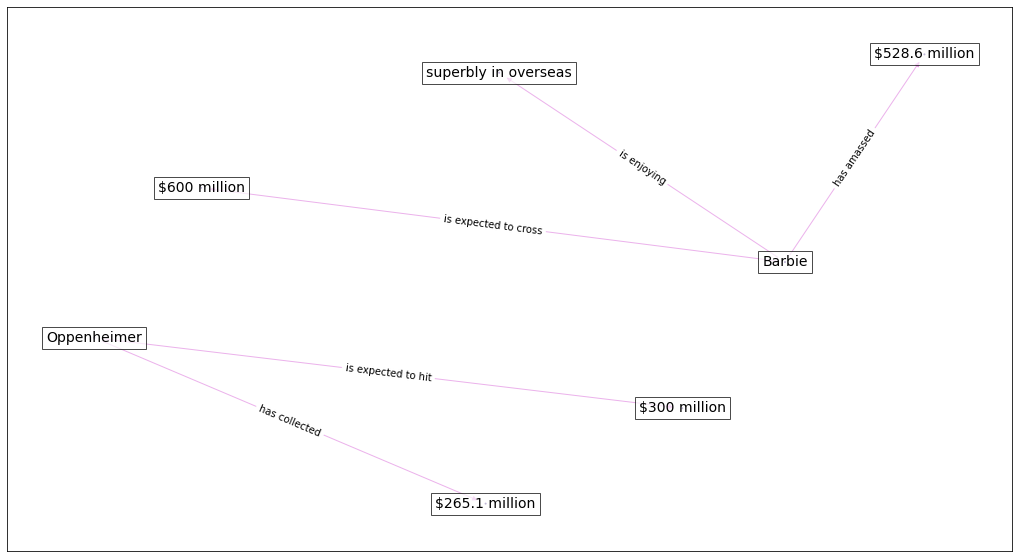

In [116]:
n_graph = news_context_graph._graph

pos = nx.kamada_kawai_layout(n_graph)
edgewidth = [len(n_graph.get_edge_data(u, v)) for u, v in n_graph.edges()]
nodesize = [1.0 for v in n_graph]

fig, ax = plt.subplots(1,1, figsize=(18, 10))
nx.draw_networkx_edges(n_graph, pos, alpha=0.3, width=edgewidth, edge_color="m")
nx.draw_networkx_nodes(n_graph, pos, node_size=nodesize, node_color="#210070", alpha=0.9)
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(n_graph, pos, font_size=14, bbox=label_options)
edge_labels = dict([((n1,n2), e1) for n1, n2, e1 in news_context_graph.get_triples()])
tmp=nx.draw_networkx_edge_labels(n_graph, pos, edge_labels)

In [113]:
news_context_chain = GraphQAChain.from_llm(OpenAI(temperature=0), graph=news_context_graph, verbose=True)

news_context_chain.run('Is Oppenheimer doing better than Barbie')



> Entering new GraphQAChain chain...
Entities Extracted:
 Oppenheimer, Barbie
Full Context:
Oppenheimer has collected $265.1 million
Oppenheimer is expected to hit $300 millionBarbie has amassed $528.6 million
Barbie is enjoying superbly in overseas
Barbie is expected to cross $600 million

> Finished chain.


' No, Barbie has amassed more money than Oppenheimer and is expected to cross $600 million while Oppenheimer is only expected to hit $300 million.'

## Context via Ontologies

<u><b>Note:</b></u><br>

<b>Public Ontologies:</b><br>
We will show how we can also tap into publicly available knowledge graphs to get the required informaton.<br>
We will use <b>WikiData's Ontology</b> to gather key information on the same topic discussed above.<br>
We will again ask some questions for which the LLM is not trained upon and will see how it performs on them when we also provide access to public Ontology.

In [117]:
from wikidata.client import Client
from wikidata.entity import Entity

In [119]:
client = Client()
entity_Oppenheimer = client.get('Q108839994', load=True)
entity_Oppenheimer

<wikidata.entity.Entity Q108839994 'Oppenheimer'>

In [120]:
interesting_props = ['P31', 'P57', 'P161', 'P495', 'P921', 'P144', 'P58', 'P162', 'P750', 'P345', 'P2671', \
                    'P577', 'P136', 'P2002']
prop_vals = []
for prop in interesting_props:
    prop_p = client.get(prop)
    prop_v = entity_Oppenheimer[prop_p]
    if isinstance(prop_v, Entity):
        prop_vals.append((str(prop_p.label), str(prop_v.label)))
    else:
        prop_vals.append((str(prop_p.label), str(prop_v)))
prop_vals

[('instance of', 'film'),
 ('director', 'Christopher Nolan'),
 ('cast member', 'Cillian Murphy'),
 ('country of origin', 'United States of America'),
 ('main subject', 'Robert Oppenheimer'),
 ('based on', 'American Prometheus'),
 ('screenwriter', 'Christopher Nolan'),
 ('producer', 'Christopher Nolan'),
 ('distributed by', 'Universal Pictures'),
 ('IMDb ID', 'tt15398776'),
 ('Google Knowledge Graph ID', '/g/11rd5hm40n'),
 ('publication date', '2023-07-21'),
 ('genre', 'historical film'),
 ('Twitter username', 'OppenheimerFilm')]

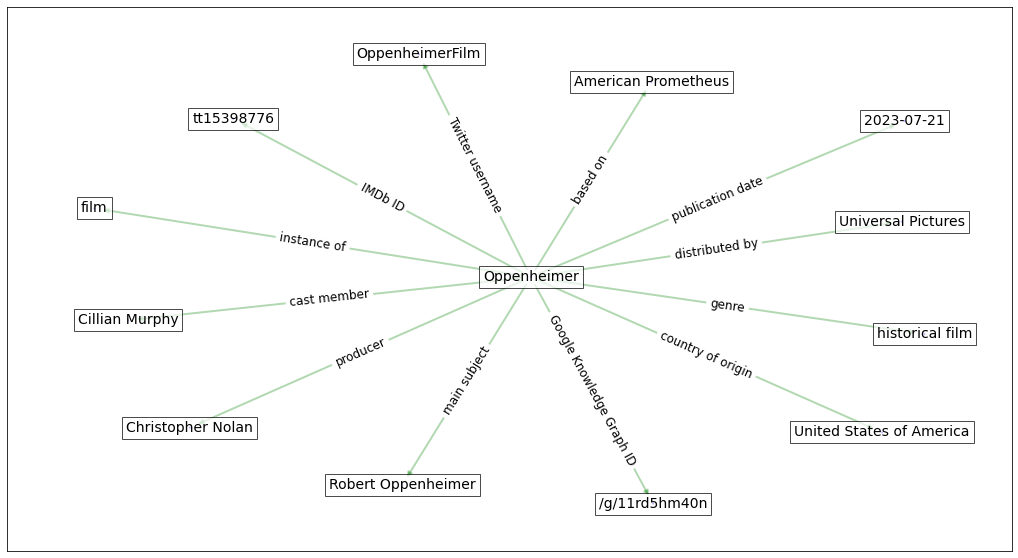

In [121]:
wiki_graph = nx.DiGraph()
wiki_graph.add_nodes_from(['Oppenheimer'] + [v for p,v in prop_vals])
wiki_graph.add_edges_from([('Oppenheimer', v) for p,v in prop_vals])

pos = nx.spring_layout(wiki_graph)
edge_labels = dict([(('Oppenheimer', v), p) for p,v in prop_vals])

edgewidth = [2.0 for u, v in wiki_graph.edges()]
nodesize = [1.0 for v in wiki_graph]

fig, ax = plt.subplots(1,1, figsize=(18, 10))
# Visualize graph components
nx.draw_networkx_edges(wiki_graph, pos, alpha=0.3, width=edgewidth, edge_color="g")
nx.draw_networkx_nodes(wiki_graph, pos, node_size=nodesize, node_color="b", alpha=0.9)
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(wiki_graph, pos, font_size=14, bbox=label_options)
tmp=nx.draw_networkx_edge_labels(wiki_graph, pos, edge_labels, font_size=12)

In [123]:
# Create an Ontology graph
from langchain.graphs.networkx_graph import KnowledgeTriple

wiki_context_graph = ontology_creator.from_text("Oppenheimer's filming location was Los Angeles")
for prop, p_val in prop_vals:
    wiki_context_graph.add_triple(KnowledgeTriple('Oppenheimer', p_val, prop))

### RAG (Retrieval Augmented Generation)

<u><b>Note:</b></u><br>

<b>RAG Retrieval Augmented Generation:</b><br>
In the example we identified the entity "Oppenheimer" and pulled its WikiData node from the public knowledge graph. We used that as a context to the LLM to ask further questions. For illustration purpose we pulled the WikiData node directly via an api, but this can be automated by first doing an entity detection and pulling the entity's node from public Ontologies.

In [125]:
wiki_context_chain = GraphQAChain.from_llm(OpenAI(temperature=0), graph=wiki_context_graph, verbose=True)

wiki_context_chain.run('When was Oppenheimer movie relased and what it is based upon.')



> Entering new GraphQAChain chain...
Entities Extracted:
 Oppenheimer, movie
Full Context:
Oppenheimer filming location Los Angeles)
END OF EXAMPL
Oppenheimer film instance of
Oppenheimer Christopher Nolan director
Oppenheimer Cillian Murphy cast member
Oppenheimer United States of America country of origin
Oppenheimer Robert Oppenheimer main subject
Oppenheimer American Prometheus based on
Oppenheimer Christopher Nolan screenwriter
Oppenheimer Christopher Nolan producer
Oppenheimer Universal Pictures distributed by
Oppenheimer tt15398776 IMDb ID
Oppenheimer /g/11rd5hm40n Google Knowledge Graph ID
Oppenheimer 2023-07-21 publication date
Oppenheimer historical film genre
Oppenheimer OppenheimerFilm Twitter username

> Finished chain.


' Oppenheimer was released on July 21, 2023 and is based on the book American Prometheus.'

# Context for LLM as Classification labels

## ZeroShot Classification

In [ ]:
from skllm import ZeroShotGPTClassifier

X, _ = get_classification_dataset()

clf = ZeroShotGPTClassifier(openai_model = "gpt-3.5-turbo")
clf.fit(None, ['positive', 'negative', 'neutral'])
labels = clf.predict(X)

## FewShot Classification

In [ ]:
from skllm import FewShotGPTClassifier

X, y = get_classification_dataset()

clf = FewShotGPTClassifier(openai_model="gpt-3.5-turbo")
clf.fit(X, y)
labels = clf.predict(X)

## Dynamic FewShot Classification

In [ ]:
from skllm import DynamicFewShotGPTClassifier

X, y = get_classification_dataset()

clf = DynamicFewShotGPTClassifier(n_examples=3) # selects N(=3) unique samples per class
clf.fit(X, y)
labels = clf.predict(X)

# LLM Embeddings

In [135]:
from transformers import AutoModel,AutoTokenizer
from sentence_transformers import SentenceTransformer
from transformers import GPT2Tokenizer, GPT2Model
import numpy as np
import torch
import pandas as pd

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

## Preparing data

In [126]:
food_sentences = [
"I just tried the most amazing sushi restaurant downtown last night.",
"I want some of Grandma's famous apple pie.",
"A pinch of sugar balances the acidity of the tomatoes beautifully.",
"The street tacos are so flavorful with that homemade salsa.",
"I love fluffy pancakes topped with maple syrup and fresh berries.",
"This butter chicken is incredible.",
"I'm craving spicy green curry and spring rolls."
]
car_driving_sentences = [
"My new sports car is a beast on the highway, the acceleration is mind-blowing.",
"Driving along the coast was so serene.",
"The quiet ride and zero emissions make my drive to work guilt-free.",
"Driving those hills and navigating through the mud was such a thrilling experience!",
"I've been working on my classic Mustang it's a blast to drive.",
"My old beater had character I have so many memories in that car.",
"I just got a new SUV, it's spacious, comfortable, and has all the latest safety features."
]
physics_sentences = [
"I find quantum mechanics fascinating.",
"We're constantly exploring the mysteries of black holes and the expansion of universe.",
"It's amazing how time and space are intertwined, and how gravity warps them.",
"Physics is all around us, just think about the laws of motion.",
"Learning about the Higgs boson makes me appreciate the complexity of the universe.",
"I love when science fiction explores theoretical physics concepts like time travel.",
"It's all thanks to the discoveries of physicists like Faraday and Maxwell."
]
medical_sentences = [
"Patient came to ed with complaints of vomiting in blood.",
"Admitted to hospital for scheduled transcatheter arterial embolization procedure.",
"Patient came to hospital consulted GI and started on pantoprazole drip.",
"Patient came to emergency via ambulance after a motor vehicle accident with extensive head injury.",
"Pt with long hx of spinal instability from past 5 yrs with relief from medication and therapy.",
"Pt with irregular heart beat and chest pain presented to ed.",
"Patient with failed medical and conservative treatment advised for right knee joint replacement."
]

In [129]:
df_1 = pd.DataFrame(zip(['Food']*len(food_sentences), food_sentences), columns=['Topic', 'Sentence'])
df_2 = pd.DataFrame(zip(['Car']*len(car_driving_sentences), car_driving_sentences), columns=['Topic', 'Sentence'])
df_3 = pd.DataFrame(zip(['Physics']*len(physics_sentences), physics_sentences), columns=['Topic', 'Sentence'])
df_4 = pd.DataFrame(zip(['Medical']*len(medical_sentences), medical_sentences), columns=['Topic', 'Sentence'])
sentence_df = pd.concat([df_1, df_2, df_3, df_4]).reset_index(drop=True)
sentence_df[:3]

,Topic,Sentence
0,Food,I just tried the most amazing sushi restaurant...
1,Food,I want some of Grandma's famous apple pie.
2,Food,A pinch of sugar balances the acidity of the t...


## Preparing LLM Models

In [168]:
# List of Huggingface models
HG = {
    'BERT-base': 'bert-base-uncased',
    'S-BERT' : 'sentence-transformers/all-MiniLM-L6-v2',
    'Bio-BERT' : 'dmis-lab/biobert-large-cased-v1.1-squad',
    'MS_PubMed-BERT' : 'microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext',
    'S-PubMed-BERT' : 'pritamdeka/S-PubMedBert-MS-MARCO'
}

In [132]:
# Load Huggingface models
def get_encoder_model(model_path,tokenizer_path):
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)
    model = AutoModel.from_pretrained(model_path)
    return model,tokenizer

In [169]:
# Load all Models and Tokenisers from Huggingface
HG_model = {}
HG_tokenizer = {}
for hgm in HG.keys():
    if 'S-' in hgm:
        HG_model[hgm] = SentenceTransformer(HG[hgm])
    else:
        HG_model[hgm], HG_tokenizer[hgm] = get_encoder_model(HG[hgm], HG[hgm])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at dmis-lab/biobert-large-cased-v1.1-squad were not used when initializing BertModel: ['qa_outputs.bias', 'qa_outputs.

In [170]:
# Load Decoder model: OpenAI's GPT-2 available as open source
gpt2_model = GPT2Model.from_pretrained("gpt2-xl")
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2-xl")
HG_model['GPT2-XL'], HG_tokenizer['GPT2-XL'] = gpt2_model, gpt2_tokenizer

## Obtain LLM Embeddings

In [137]:
# Get pooled embedding vector for any Encoder model
def get_encoder_pooler_embedding(model, tokenizer, sentence):
    sent_toknized = tokenizer(sentence, return_tensors='pt')
    model_output = model(**sent_toknized)
    return model_output['pooler_output'].detach().numpy().reshape(-1,)

In [138]:
# Get sentence embedding fron a Sentence-Encoder model
def get_sentence_encoder_embedding(s_model, sentence):
    return s_model.encode(sentence)

In [139]:
# Get mean embedding vector for any Decoder model
def get_decoder_mean_embedding(model, tokenizer, sentence):
    sent_toknized = tokenizer(sentence, return_tensors='pt')
    model_output = model(**sent_toknized)
    return torch.mean(model_output['last_hidden_state'][0], 0).detach().numpy().reshape(-1,)

In [141]:
# Obtain OpenAI's (ChatGPT) embedding vector via api
def get_openai_embedding(text: str, model="text-embedding-ada-002"):
    return np.array(openai.Embedding.create(input=text, model=model)["data"][0]["embedding"])

In [140]:
# Helper functions: Cosine Similarity distance matrix computation 
def np_cosine(vec_a, vec_b):
    return np.dot(vec_a, vec_b)/(np.linalg.norm(vec_a)*np.linalg.norm(vec_b))

def np_cos_dist_mat(mat_a):
    np_dist_mat =np.zeros((mat_a.shape[0],mat_a.shape[0]))
    for i in range(mat_a.shape[0]):
        for j in range(mat_a.shape[0]):
            np_dist_mat[i][j] = np_cosine(mat_a[i], mat_a[j])
    return np_dist_mat

In [142]:
# Generate embeddings for Encoder only models
encoder_embedings = ['BERT-base', 'Bio-BERT', 'MS_PubMed-BERT']
for hgm in encoder_embedings:
    sentence_df[hgm + '_embd'] = sentence_df['Sentence'].apply(lambda s: get_encoder_pooler_embedding(HG_model[hgm], HG_tokenizer[hgm], s))
sentence_df.shape

(28, 5)

In [143]:
# Generate embeddings for Sentece-Encoder models
sentence_encoder_embedings = ['S-BERT', 'S-PubMed-BERT']
for hgm in sentence_encoder_embedings:
    sentence_df[hgm + '_embd'] = sentence_df['Sentence'].apply(lambda s: get_sentence_encoder_embedding(HG_model[hgm], s))
sentence_df.shape 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


(28, 7)

In [144]:
# Generate embeddings for Decoder only models
sentence_df['GPT2-XL' + '_embd'] = sentence_df['Sentence'].apply(lambda s: get_decoder_mean_embedding(HG_model['GPT2-XL'], HG_tokenizer['GPT2-XL'], s))
sentence_df.shape

(28, 8)

In [145]:
open_ai_embed_list = []

In [146]:
# Generate embeddings for OpenAi-GPT Decoder models
# Do it in batches of 3 to avoid rate limit error (3/min)
open_ai_embed_list.extend(sentence_df['Sentence'][24:27].apply(lambda s: get_openai_embedding(s)).values.tolist())

In [156]:
sentence_df['OpenAI-GPT3.5' + '_embd'] = open_ai_embed_list
sentence_df.shape

(28, 9)

In [157]:
# Compute all Cosine distance matrices
dist_mat_embd = {}
for hgm in encoder_embedings + sentence_encoder_embedings + ['GPT2-XL', 'OpenAI-GPT3.5']:
    dist_mat_embd[hgm] = np_cos_dist_mat(sentence_df[hgm + '_embd'].values)

### BERT-base

<AxesSubplot:>

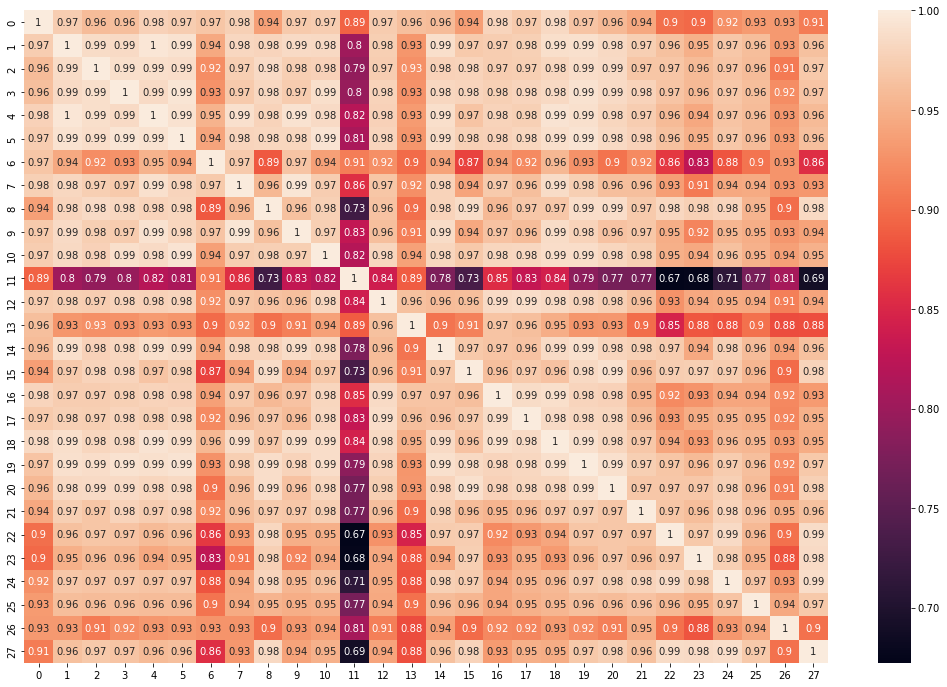

In [158]:
# Plot distance matrix as heat-map
fig, ax = plt.subplots(1,1,figsize=(18,12))
sns.heatmap(dist_mat_embd['BERT-base'], annot=True, ax=ax)

### S-BERT

<AxesSubplot:>

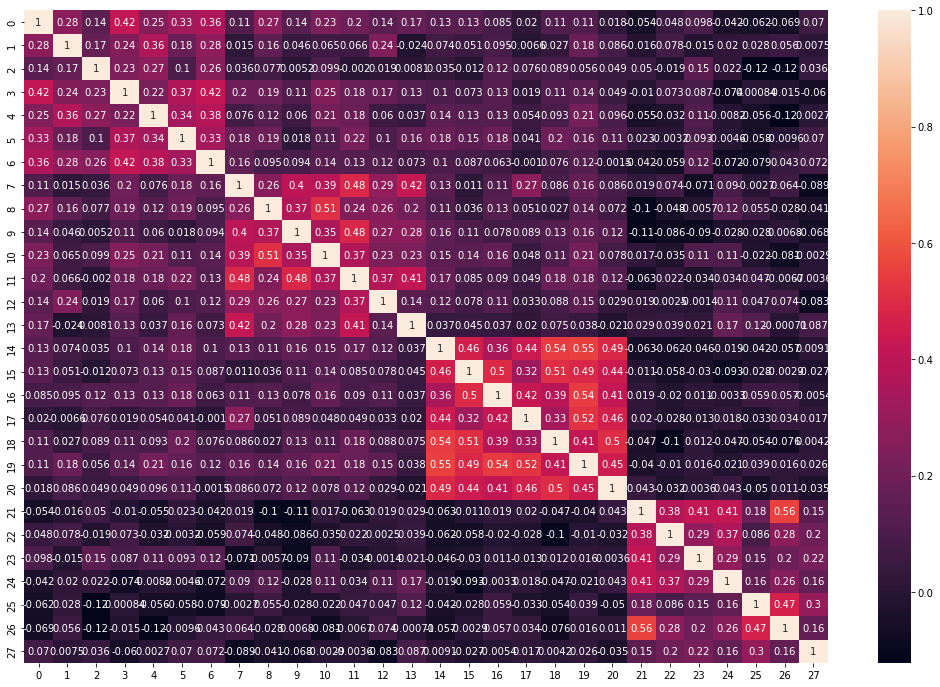

In [159]:
# Plot distance matrix as heat-map
fig, ax = plt.subplots(1,1,figsize=(18,12))
sns.heatmap(dist_mat_embd['S-BERT'], annot=True, ax=ax)

### OpenAI GPT2 (Public)

<AxesSubplot:>

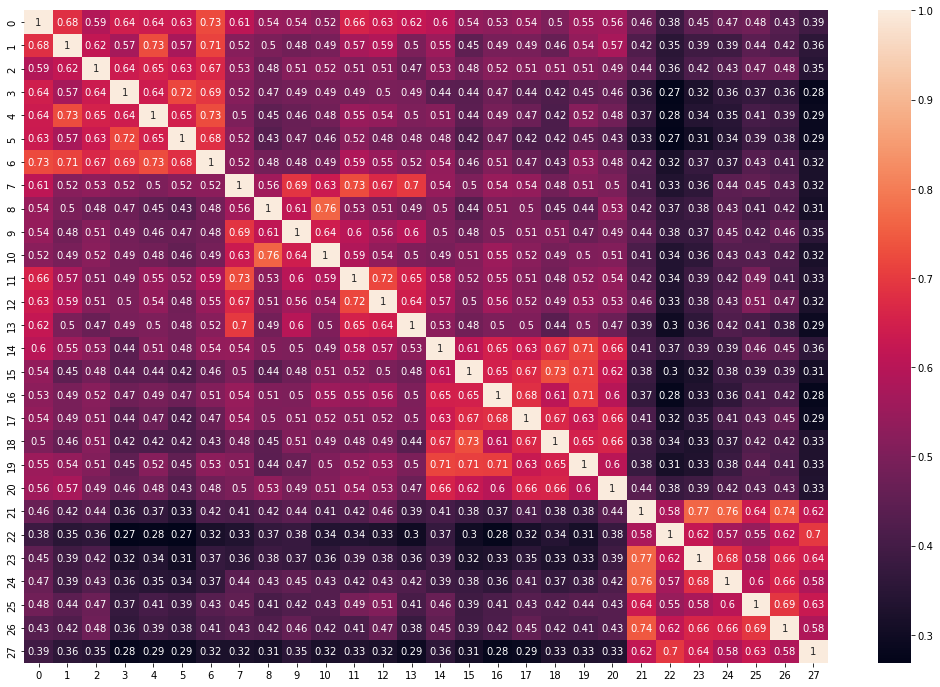

In [160]:
# Plot distance matrix as heat-map
fig, ax = plt.subplots(1,1,figsize=(18,12))
sns.heatmap(dist_mat_embd['GPT2-XL'], annot=True, ax=ax)

### OpenAI GPT-3 (Commercial)

<AxesSubplot:>

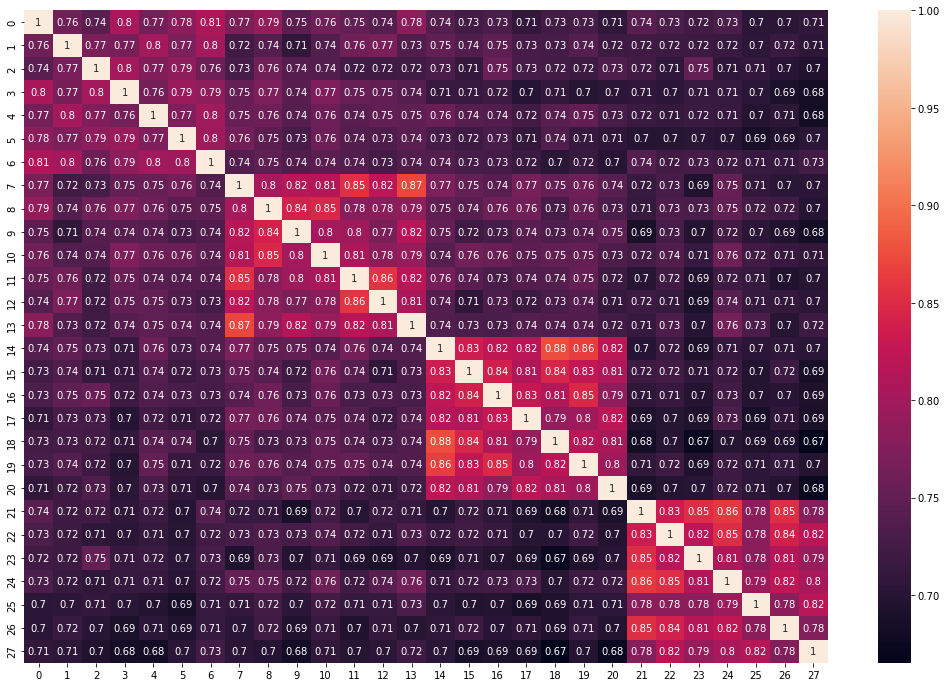

In [161]:
# Plot distance matrix as heat-map for "OpenAI's commercial embeddings"
fig, ax = plt.subplots(1,1,figsize=(18,12))
sns.heatmap(dist_mat_embd['OpenAI-GPT3.5'], annot=True, ax=ax)

### Bio-BERT

<AxesSubplot:>

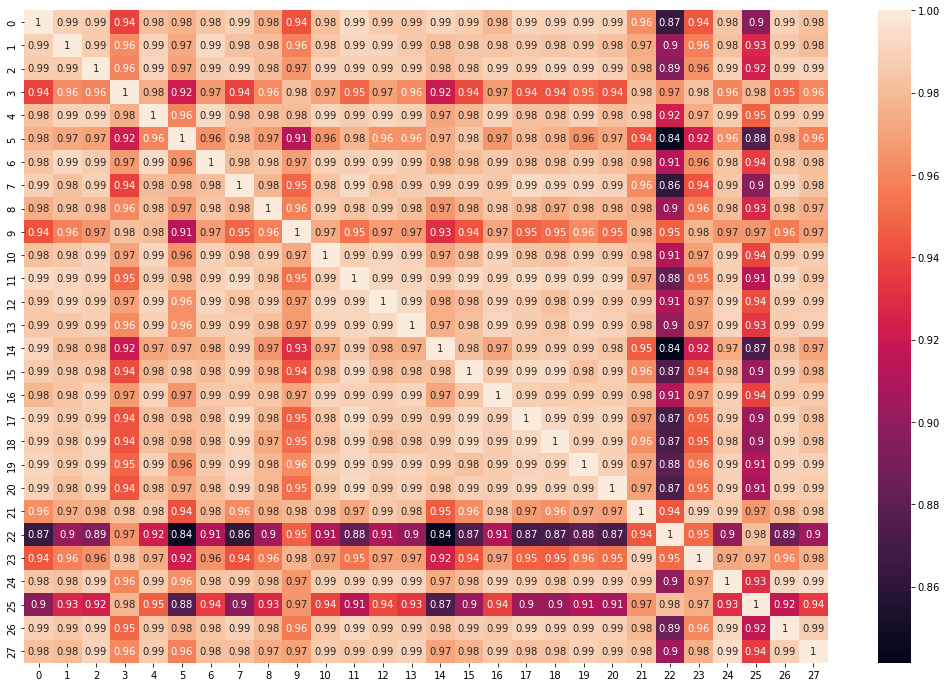

In [162]:
# Plot distance matrix as heat-map
fig, ax = plt.subplots(1,1,figsize=(18,12))
sns.heatmap(dist_mat_embd['Bio-BERT'], annot=True, ax=ax)

### PubMed-BERT

<AxesSubplot:>

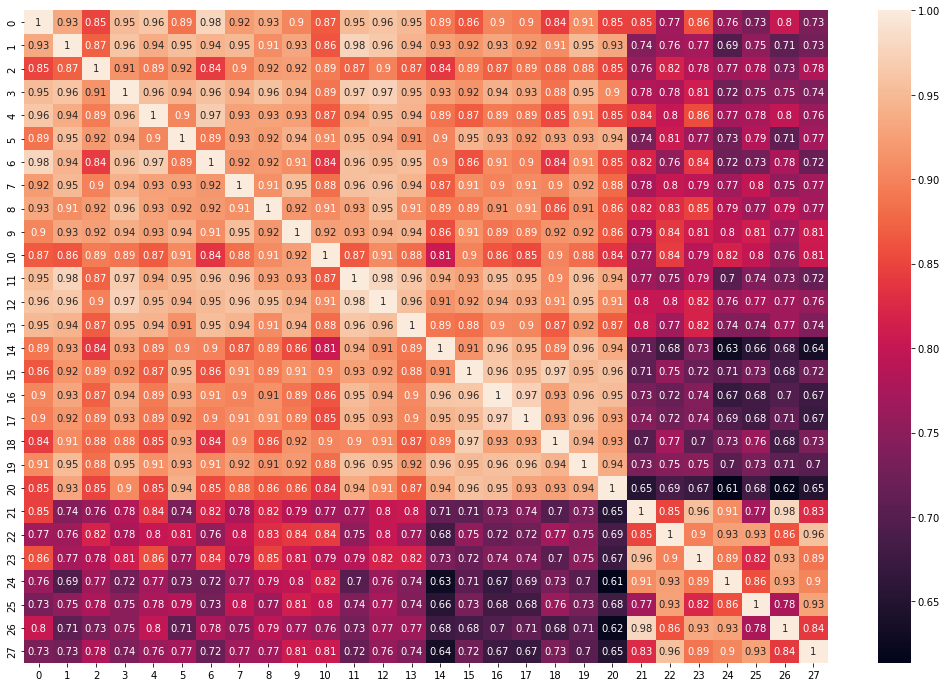

In [179]:
# Plot distance matrix as heat-map
fig, ax = plt.subplots(1,1,figsize=(18,12))
sns.heatmap(dist_mat_embd['MS_PubMed-BERT'], annot=True, ax=ax)

### S-PubMed-BERT

<AxesSubplot:>

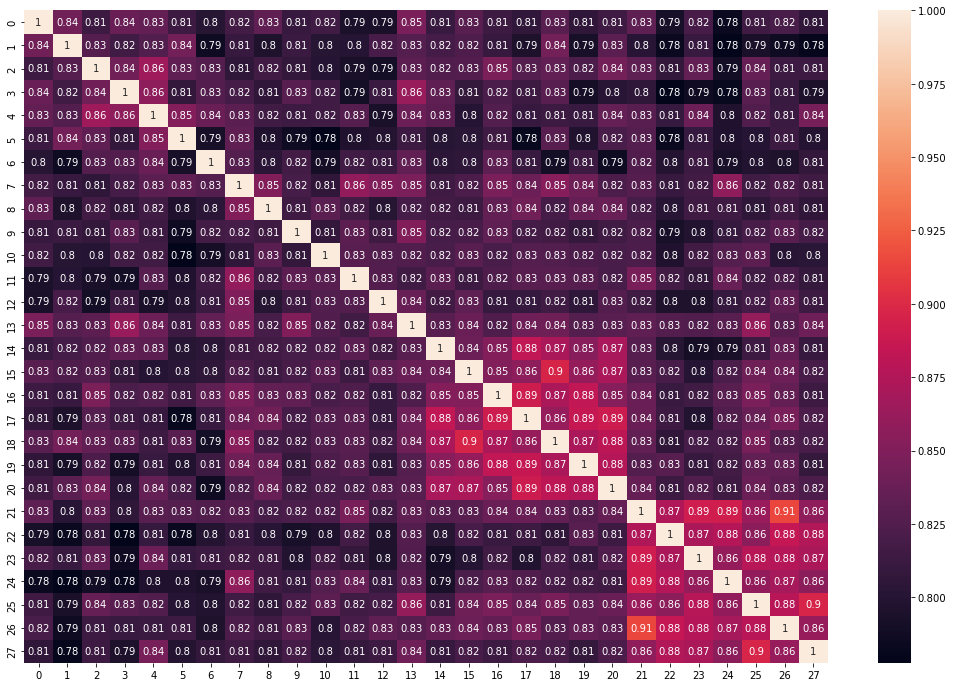

In [164]:
# Plot distance matrix as heat-map
fig, ax = plt.subplots(1,1,figsize=(18,12))
sns.heatmap(dist_mat_embd['S-PubMed-BERT'], annot=True, ax=ax)

## Visualising Embeddings

In [180]:
from sklearn.manifold import MDS

<b><u>Note:</u></b><br>

<b>Don't use t-SNE for manifold construction:</b><br>
  1.) <b>Cluster sizes in a t-SNE plot mean nothing</b><br>
  2.) <b>Distances between clusters might not mean anything</b><br>

t-SNE is complex and can sometimes result into mis-interpretations:
* The algorithm is non-linear and adapts to the underlying data, it performs different transformations on different regions
* These differences can be a major source of confusion
* t-SNE has a tuneable parameter, “perplexity,”
   * Which says (loosely) how to balance attention between local and global aspects of your data
* The parameter is, in a sense, a guess about the number of close neighbors each point has.
   * It has a complex effect on the resulting pictures.

In [186]:
# MDS - Multi Dimensional Scaling
def plot_MDS_manifold(embedding_series, ax=None, embed_colors=None):
    embedding_vecs = np.array(embedding_series.values.tolist())
    mds_model = MDS(n_components=2, normalized_stress='auto')
    mds_embed = mds_model.fit_transform(embedding_vecs)
    
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=(18,9))
    ax.scatter(mds_embed[:, 0], mds_embed[:, 1], c=embed_colors, s=80)
    ax.set_title(embedding_series.name)

In [182]:
# Topic colors   Food             Cars           Physics       Medical  
group_colors = ['orange'] * 7 + ['green'] * 7 + ['blue'] * 7 + ['red'] * 7

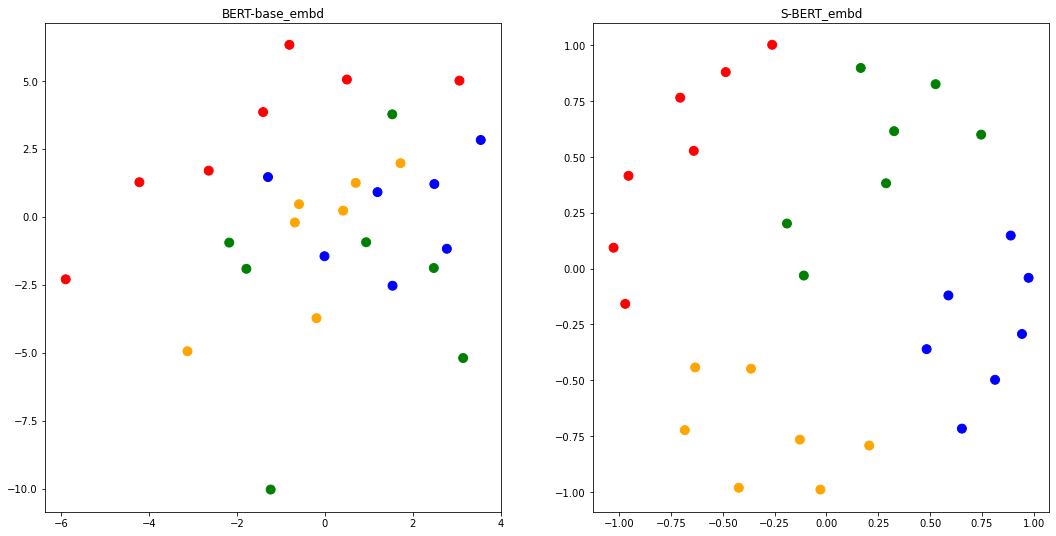

In [197]:
fig, ax = plt.subplots(1,2, figsize=(18,9))
plot_MDS_manifold(sentence_df['BERT-base_embd'], ax=ax[0], embed_colors=group_colors)
plot_MDS_manifold(sentence_df['S-BERT_embd'], ax=ax[1], embed_colors=group_colors)

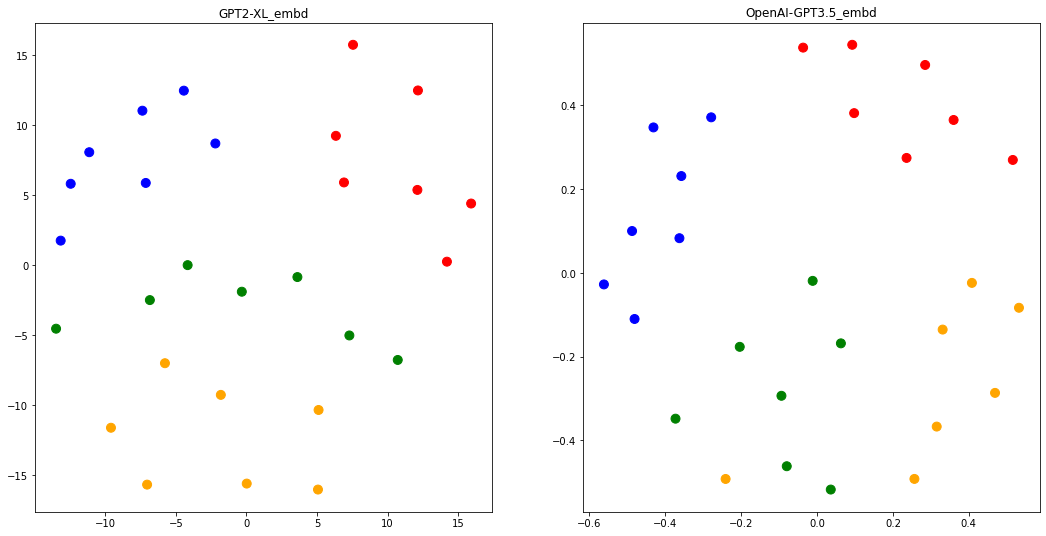

In [190]:
fig, ax = plt.subplots(1,2, figsize=(18,9))
plot_MDS_manifold(sentence_df['GPT2-XL_embd'], ax=ax[0], embed_colors=group_colors)
plot_MDS_manifold(sentence_df['OpenAI-GPT3.5_embd'], ax=ax[1], embed_colors=group_colors)

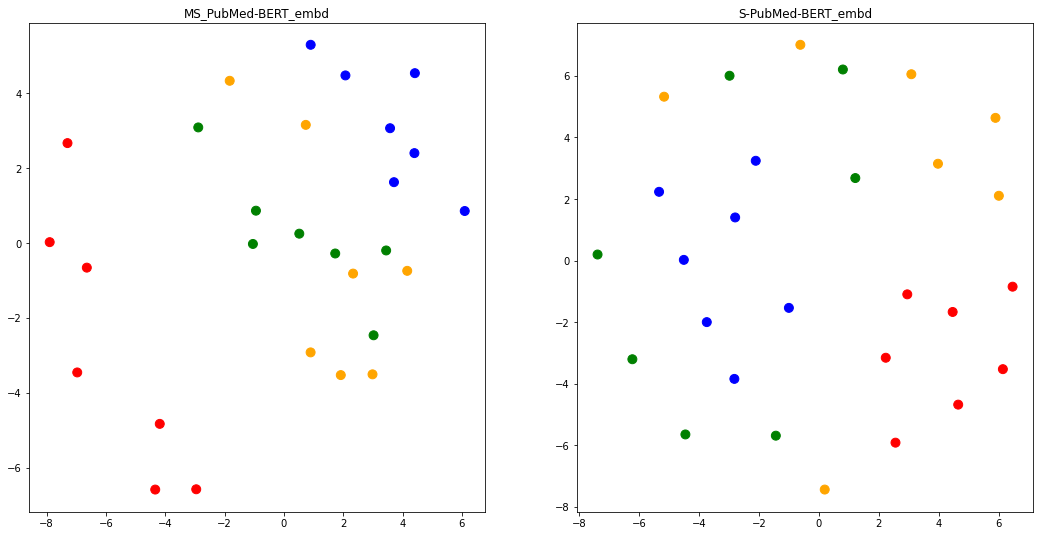

In [194]:
fig, ax = plt.subplots(1,2, figsize=(18,9))
plot_MDS_manifold(sentence_df['MS_PubMed-BERT_embd'], ax=ax[0], embed_colors=group_colors)
plot_MDS_manifold(sentence_df['S-PubMed-BERT_embd'], ax=ax[1], embed_colors=group_colors)

# LLM Embeddings for Precision

## Preparing data

In [198]:
similar_diagnoses_df = pd.read_excel('Medical_strings.xlsx', sheet_name=0)
haemorrhage_df = pd.read_excel('Medical_strings.xlsx', sheet_name=1)
procedures_df = pd.read_excel('Medical_strings.xlsx', sheet_name=3)
pd.set_option('display.max_colwidth', 1000)

In [202]:
haemorrhage_df.iloc[:,0:4]

,Sentence,Phrase,Codes,Description
0,"27-yrs-old came to ed with complaints of blood in vomiting, Gastro Entrologist consulted and pt underwent EGD and diagnosed with Gastro Intestinal bleeding from unknown source.",Gastro Intestinal bleeding,K92.2,"Gastrointestinal haemorrhage, unspecified"
1,18-yrs old asian female admitted to hospital for scheduled transcatheter arterial embolization procedure by her gastroenterologist due bleeding from duodenal ulcer.,due bleeding from duodenal ulcer,K26.4,Chronic or unspecified duodenal ulcer with haemorrhage
2,"68-yrs-old male with no significant past medical history came to hospital for the complain of blood in stool from past 2 days ,GI consulted and started on pantoprazole drip ,",blood in stool,K92.1,Melena
3,"34-old-female came to ed via ambulance after a motor vehicle accident with extensive head injury ,CT head showed traumatic subdural hematoma.",traumatic subdural hematoma,S06.5XA,Traumatic subdural haemorrhage with loss of consciousness status unknown.
4,"19-yrs-old female with hx of peptic ulcer disease admitted to hospital with hematemesis, symptoms suggestive for bleeding peptic ulcer.",bleeding peptic ulcer,K27.4,"Chronic or unspecified peptic ulcer, site unspecified, with haemorrhage"


In [203]:
similar_diagnoses_df.iloc[:,0:4]

,Sentence,Phrase,Codes,Description
0,"64-yrs-old came to emergency for increased sob, doe and light-headedness, echo showed ventricular systolic dysfunction, suggestive for acute systolic heart failure,",acute systolic heart failure,I50.21,Acute systolic (congestive) heart failure
1,"77-yrs-old female with history of heart failure with reduced ejection fraction came to ED with chest pain and elevated Bp and pt is non-compliant with her heart failure medication, symptoms suggestive for the diagnosis of acute on chronic systolic heart failure.",acute on chronic systolic heart failure,I50.22,Acute on chronic systolic (congestive) heart failure
2,"57-yrs-old male came to ED with lower extremity edema and increased fatigue, went for cardiac catheterisation and diagnosed with systolic heart failure.",systolic heart failure,I50.20,Unspecified systolic (congestive) heart failure
3,"79-yrs-old male came to ED on this morning for doe and irregular heartbeat, past medical hx includes htn, hld, gerd and diastolic dysfunction, previous and current ejection fraction remains same 60-65%,which is suggestive of chronic diastolic heart failure.",chronic diastolic heart failure,I50.32,Chronic diastolic (congestive) heart failure
4,"42-yrs-old Caucasian female with hx of chronic combined systolic and diastolic heart failure admitted to ed yesterday night with complaints breathlessness, severe chest pain and weakness ,urgently went for cardiac catheterisation and underwent PCI with two drug eluting stents placed in the proximal LAD due to exacerbation of his chronic combined systolic and diastolic heart failure",exacerbation of his chronic combined systolic and diastolic heart failure,I50.43,Acute on chronic combined systolic (congestive) and diastolic (congestive) heart failure
5,"57-Yrs-old female with hx of multiple co-morbidities came to ED for chest pain, lower extremity edema and sob with family hx of heart failure ,bnp elevated and suggestive for congestive heart failure",congestive heart failure,I50.9,"Heart failure, unspecified"


In [204]:
procedures_df.iloc[:,0:5]

,Procedure,Procedure_alt_name,Phrase,Phrase_alt,Sentence
0,Arthrodesis,Fusion,lumbar Arthrodesis,lumbar Fusion,Patient with long hx of spinal instability from past 5 yrs with relief from medication and therapy scheduled for lumbar Arthrodesis.
1,EKG,Electrocardiogram,EKG performed,Electrocardiogram performed,"Patient with irregular heart beat and chest pain presented to ed, EKG performed for suspected cardiac etiology."
2,Arthroplasty,Joint replacement,knee Arthroplasty,knee joint replacement,"Patient with hx of severe right knee osteoarthritis, with failed medical and conservative treatment advised for right knee Arthroplasty."
3,EGD,Esophagogastroduodenoscopy,scheduled EGD,scheduled Esophagogastroduodenoscopy,Patient with 3 months hx of gastric reflux came to er for scheduled EGD
4,PTCA,"Coronary Angioplasty, PCI",Percutaneous transluminal coronary angioplasty,Percutaneous coronary intervention,Patient admitted with hx of coronary artery disease underwent PTCA (Percutaneous transluminal coronary angioplasty) and 1 drug eluting stent placed in distal marginal artery due to 99% of obstruction which is complicating the Patient current condition.


## Preparing LLM Models

In [212]:
# List of Huggingface models
HG = {
    'BERT-base': 'bert-base-uncased',
    'S-BERT' : 'sentence-transformers/all-MiniLM-L6-v2',
    'Bio-BERT' : 'dmis-lab/biobert-large-cased-v1.1-squad',
    'MS_PubMed-BERT' : 'microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext',
    'DischargeSummary-BERT' : 'emilyalsentzer/Bio_Discharge_Summary_BERT',
    'BioClinical-BERT' : 'emilyalsentzer/Bio_ClinicalBERT',
    'UMLS-BERT' : './umls_bert/umlsbert/',
    'PubMed-BERT' : 'pritamdeka/S-PubMedBert-MS-MARCO',
    'S-PubMed-BERT' : 'pritamdeka/S-PubMedBert-MS-MARCO'
}

In [213]:
# List of Encoder word models
encoder_word_models = [hg_m for hg_m in HG.keys() if not hg_m.startswith('S-')]

# List of Sentence-Encoder models
sentence_encoder_models = [hg_m for hg_m in HG.keys() if hg_m.startswith('S-')]

In [214]:
# Load all models and Tokenisers from Hugginface
HG_model = {}
HG_tokenizer = {}
for hgm in HG.keys():
    if hgm.startswith('S-'):
        HG_model[hgm] = SentenceTransformer(HG[hgm])
    else:
        HG_model[hgm], HG_tokenizer[hgm] = get_encoder_model(HG[hgm], HG[hgm])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at dmis-lab/biobert-large-cased-v1.1-squad were not used when initializing BertModel: ['qa_outputs.bias', 'qa_outputs.

## Choosing right pooling strategy

In [215]:
# Get Pooled embedding vector for any Encoder model
def get_encoder_pooler_embedding(model, tokenizer, sentence):
    sent_toknized = tokenizer(sentence, return_tensors='pt')
    model_output = model(**sent_toknized)
    return model_output['pooler_output'].detach().numpy().reshape(-1,)

# Get CLS embedding vector for Encoder models
def get_encoder_cls_embedding(model, tokenizer, sentence):
    sent_toknized = tokenizer(sentence, return_tensors='pt')
    model_output = model(**sent_toknized)
    return model_output['last_hidden_state'][0][0].detach().numpy().reshape(-1,)

# Get Mean embedding vector for Encoder models
def get_encoder_mean_embedding(model, tokenizer, sentence):
    sent_toknized = tokenizer(sentence, return_tensors='pt')
    model_output = model(**sent_toknized)
    return torch.mean(model_output['last_hidden_state'][0], 0).detach().numpy().reshape(-1,)

# Cross matrix distance matrix
def np_cos_cross_dist_mat(mat_a, mat_b):
    np_dist_mat =np.zeros((mat_a.shape[0], mat_b.shape[0]))
    for i in range(mat_a.shape[0]):
        for j in range(mat_b.shape[0]):
            np_dist_mat[i][j] = np_cosine(mat_a[i], mat_b[j])
    return np_dist_mat

In [216]:
# Dataset for choosing pooling strategy
procedures_df.iloc[:,2:4]

,Phrase,Phrase_alt
0,lumbar Arthrodesis,lumbar Fusion
1,EKG performed,Electrocardiogram performed
2,knee Arthroplasty,knee joint replacement
3,scheduled EGD,scheduled Esophagogastroduodenoscopy
4,Percutaneous transluminal coronary angioplasty,Percutaneous coronary intervention


In [217]:
# Generate Phrase embeddings for Encoder only models
for hgm in encoder_word_models:
    # Pooled vectors
    procedures_df['Phrase_' + hgm + '_embd_pool'] = procedures_df['Phrase'].apply(lambda s: get_encoder_pooler_embedding(HG_model[hgm], HG_tokenizer[hgm], s))
    procedures_df['Phrase_alt_' + hgm + '_embd_pool'] = procedures_df['Phrase_alt'].apply(lambda s: get_encoder_pooler_embedding(HG_model[hgm], HG_tokenizer[hgm], s))
    
    # CLS vectors
    procedures_df['Phrase_' + hgm + '_embd_cls'] = procedures_df['Phrase'].apply(lambda s: get_encoder_cls_embedding(HG_model[hgm], HG_tokenizer[hgm], s))
    procedures_df['Phrase_alt_' + hgm + '_embd_cls'] = procedures_df['Phrase_alt'].apply(lambda s: get_encoder_cls_embedding(HG_model[hgm], HG_tokenizer[hgm], s))
    
    # Mean vectors
    procedures_df['Phrase_' + hgm + '_embd_mean'] = procedures_df['Phrase'].apply(lambda s: get_encoder_mean_embedding(HG_model[hgm], HG_tokenizer[hgm], s))
    procedures_df['Phrase_alt_' + hgm + '_embd_mean'] = procedures_df['Phrase_alt'].apply(lambda s: get_encoder_mean_embedding(HG_model[hgm], HG_tokenizer[hgm], s))
procedures_df.shape 

(5, 48)

In [218]:
# Compute pairwise cosine similarity for Phrase and Phrase_alt
for hgm in encoder_word_models:
    procedures_df['Phrase_pair_pool'] = procedures_df[['Phrase_' + hgm + '_embd_pool', 'Phrase_alt_' + hgm + '_embd_pool']].apply(lambda r: np.round(np_cosine(r[0], r[1]), 3), axis=1)
    procedures_df['Phrase_pair_cls'] = procedures_df[['Phrase_' + hgm + '_embd_cls', 'Phrase_alt_' + hgm + '_embd_cls']].apply(lambda r: np.round(np_cosine(r[0], r[1]), 3), axis=1)
    procedures_df['Phrase_pair_mean'] = procedures_df[['Phrase_' + hgm + '_embd_mean', 'Phrase_alt_' + hgm + '_embd_mean']].apply(lambda r: np.round(np_cosine(r[0], r[1]), 3), axis=1)
procedures_df.shape

(5, 51)

In [219]:
procedures_df[['Phrase_pair_pool', 'Phrase_pair_cls', 'Phrase_pair_mean']]

,Phrase_pair_pool,Phrase_pair_cls,Phrase_pair_mean
0,0.971,0.963,0.951
1,0.958,0.953,0.942
2,0.970,0.968,0.957
3,0.962,0.941,0.929
4,0.974,0.968,0.957


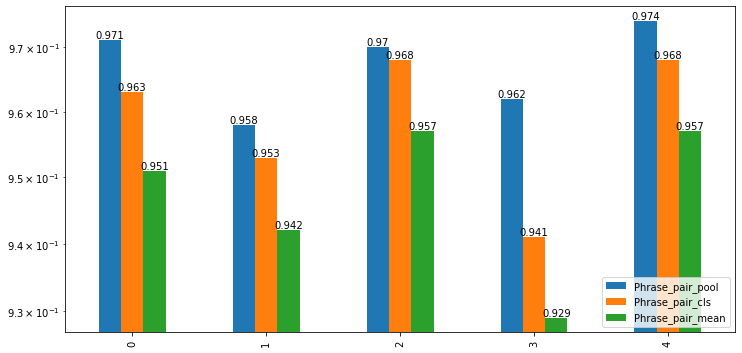

In [220]:
# Visualise pairwise cosine similarities
fig, ax = plt.subplots(1,1,figsize=(12,6))
procedures_df[['Phrase_pair_pool', 'Phrase_pair_cls', 'Phrase_pair_mean']].plot(kind='bar', ax=ax).legend(loc='lower right')
ax.set_yscale('log')
for container in ax.containers:
    ax.bar_label(container)

## Effect of Tokenizers

In [222]:
medical_sentence = 'Chronic or unspecified duodenal ulcer with haemorrhage'

In [223]:
# Tokenize medical sentence with different tokenizers 
for hgm in encoder_word_models:
    med_sent_tokenized = HG_tokenizer[hgm](medical_sentence)
    med_toks = HG_tokenizer[hgm].convert_ids_to_tokens(med_sent_tokenized['input_ids'])
    print(hgm, med_toks, '\n')

BERT-base ['[CLS]', 'chronic', 'or', 'unspecified', 'duo', '##den', '##al', 'ul', '##cer', 'with', 'ha', '##em', '##or', '##rh', '##age', '[SEP]'] 

Bio-BERT ['[CLS]', 'chronic', 'or', 'un', '##specified', 'duodenal', 'ulcer', 'with', 'hae', '##mor', '##rh', '##age', '[SEP]'] 

MS_PubMed-BERT ['[CLS]', 'chronic', 'or', 'unspec', '##ified', 'duodenal', 'ulcer', 'with', 'haemorrhage', '[SEP]'] 

DischargeSummary-BERT ['[CLS]', 'chronic', 'or', 'un', '##sp', '##ec', '##ified', 'duo', '##den', '##al', 'ul', '##cer', 'with', 'ha', '##em', '##or', '##r', '##hage', '[SEP]'] 

BioClinical-BERT ['[CLS]', 'chronic', 'or', 'un', '##sp', '##ec', '##ified', 'duo', '##den', '##al', 'ul', '##cer', 'with', 'ha', '##em', '##or', '##r', '##hage', '[SEP]'] 

UMLS-BERT ['[CLS]', 'chronic', 'or', 'un', '##sp', '##ec', '##ified', 'duo', '##den', '##al', 'ul', '##cer', 'with', 'ha', '##em', '##or', '##r', '##hage', '[SEP]'] 

PubMed-BERT ['[CLS]', 'chronic', 'or', 'unspec', '##ified', 'duodenal', 'ulcer', 'w

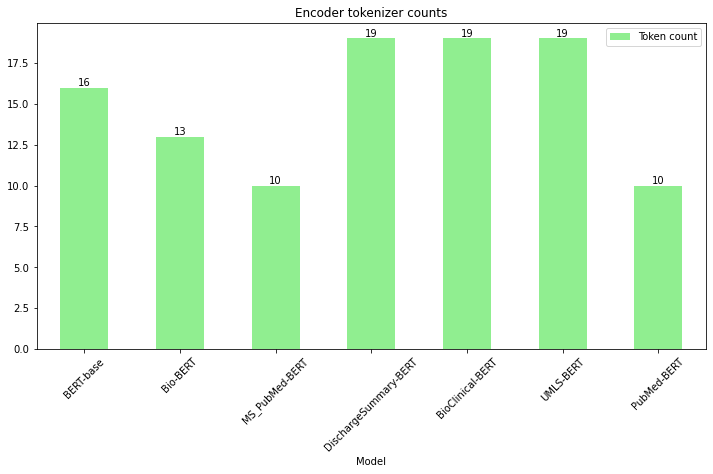

In [224]:
# Visualize count of tokens for each Tokenizer
med_toks_list = []
for hgm in encoder_word_models:
    med_sent_tokenized = HG_tokenizer[hgm](med_sent)
    med_toks = HG_tokenizer[hgm].convert_ids_to_tokens(med_sent_tokenized['input_ids'])
    med_toks_list.append((hgm, len(med_toks)))
    
fig, ax = plt.subplots(1,1, figsize=(12,6))
pd.DataFrame(med_toks_list, columns=['Model', 'Token count']).set_index('Model').plot(kind='bar', ax=ax, title='Encoder tokenizer counts', color='lightgreen').legend(loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
for container in ax.containers:
    ax.bar_label(container)

## Using Entities vs Larger context

In [225]:
haemorrhage_df.iloc[:,0:4]

,Sentence,Phrase,Codes,Description
0,"27-yrs-old came to ed with complaints of blood in vomiting, Gastro Entrologist consulted and pt underwent EGD and diagnosed with Gastro Intestinal bleeding from unknown source.",Gastro Intestinal bleeding,K92.2,"Gastrointestinal haemorrhage, unspecified"
1,18-yrs old asian female admitted to hospital for scheduled transcatheter arterial embolization procedure by her gastroenterologist due bleeding from duodenal ulcer.,due bleeding from duodenal ulcer,K26.4,Chronic or unspecified duodenal ulcer with haemorrhage
2,"68-yrs-old male with no significant past medical history came to hospital for the complain of blood in stool from past 2 days ,GI consulted and started on pantoprazole drip ,",blood in stool,K92.1,Melena
3,"34-old-female came to ed via ambulance after a motor vehicle accident with extensive head injury ,CT head showed traumatic subdural hematoma.",traumatic subdural hematoma,S06.5XA,Traumatic subdural haemorrhage with loss of consciousness status unknown.
4,"19-yrs-old female with hx of peptic ulcer disease admitted to hospital with hematemesis, symptoms suggestive for bleeding peptic ulcer.",bleeding peptic ulcer,K27.4,"Chronic or unspecified peptic ulcer, site unspecified, with haemorrhage"


In [226]:
# Generate {Sentence, Phrase, Description} embeddings for Encoder only models
for hgm in encoder_word_models:
    haemorrhage_df['Sentence_' + hgm + '_embd'] = haemorrhage_df['Sentence'].apply(lambda s: get_encoder_pooler_embedding(HG_model[hgm], HG_tokenizer[hgm], s))
    haemorrhage_df['Phrase_' + hgm + '_embd'] = haemorrhage_df['Phrase'].apply(lambda s: get_encoder_pooler_embedding(HG_model[hgm], HG_tokenizer[hgm], s))
    haemorrhage_df['Description_' + hgm + '_embd'] = haemorrhage_df['Description'].apply(lambda s: get_encoder_pooler_embedding(HG_model[hgm], HG_tokenizer[hgm], s))
haemorrhage_df.shape 

(5, 27)

In [227]:
# Generate {Sentence, Phrase, Description} embeddings for "Sentence-Encoder" models
for hgm in sentence_encoder_models:
    haemorrhage_df['Sentence_' + hgm + '_embd'] = haemorrhage_df['Sentence'].apply(lambda s: get_sentence_encoder_embedding(HG_model[hgm], s))
    haemorrhage_df['Phrase_' + hgm + '_embd'] = haemorrhage_df['Phrase'].apply(lambda s: get_sentence_encoder_embedding(HG_model[hgm], s))
    haemorrhage_df['Description_' + hgm + '_embd'] = haemorrhage_df['Description'].apply(lambda s: get_sentence_encoder_embedding(HG_model[hgm], s))
haemorrhage_df.shape 

(5, 33)

In [228]:
# Create cross-distance matrix between : {Sentence, Description}, {Phrase, Description}
hae_cross_dist_mat_sent_desc = {}
hae_cross_dist_mat_phrs_desc = {}

for hgm in encoder_word_models + sentence_encoder_models:
    hae_cross_dist_mat_sent_desc[hgm] = np_cos_cross_dist_mat(haemorrhage_df['Sentence_' + hgm + '_embd'].values, haemorrhage_df['Description_' + hgm + '_embd'].values)
    hae_cross_dist_mat_phrs_desc[hgm] = np_cos_cross_dist_mat(haemorrhage_df['Phrase_' + hgm + '_embd'].values, haemorrhage_df['Description_' + hgm + '_embd'].values)    

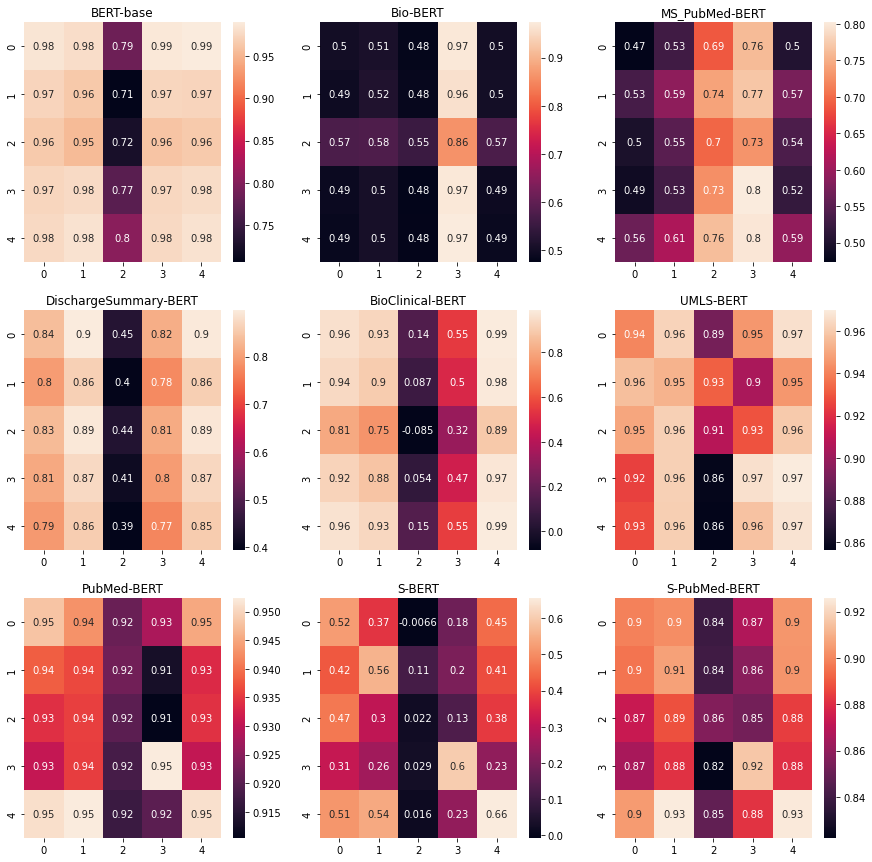

In [229]:
# Visualize all cross-distance matrices for {Sentence, Description} pair
fig, axes = plt.subplots(3,3, figsize=(15,15))
for hgm,axi in zip(encoder_word_models + sentence_encoder_models, axes.flatten()):
    sns.heatmap(hae_cross_dist_mat_sent_desc[hgm], annot=True, ax=axi)
    axi.set_title(hgm)

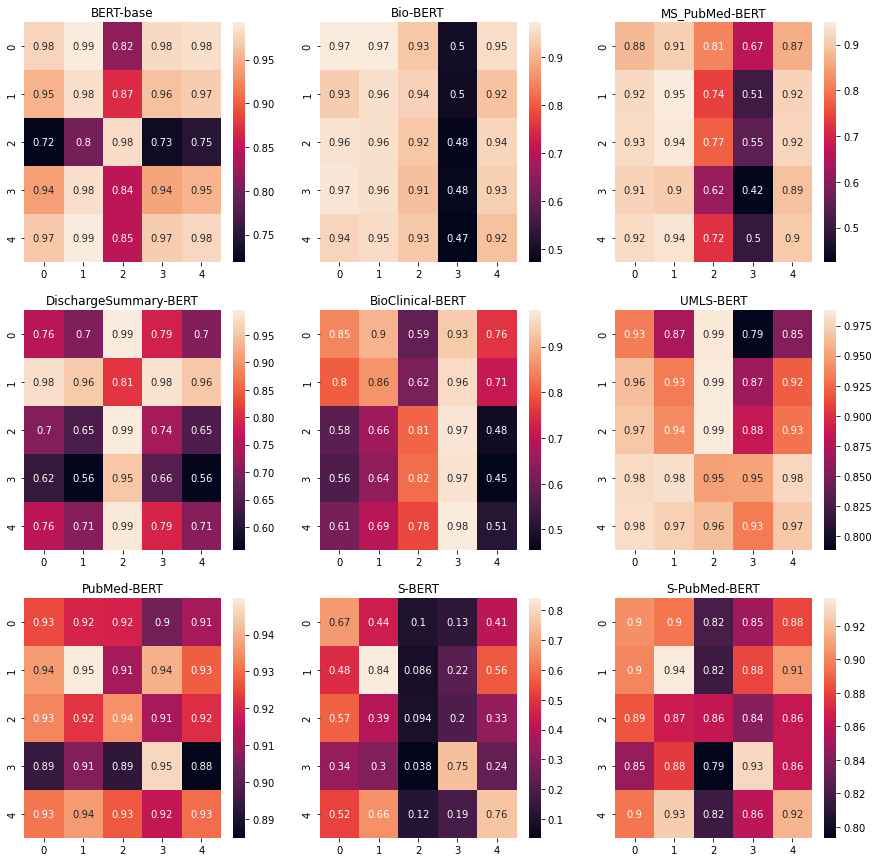

In [230]:
# Visualize all cross-distance matrix for {Phrase, Description} pairs
fig, axes = plt.subplots(3,3, figsize=(15,15))
for hgm,axi in zip(encoder_word_models + sentence_encoder_models, axes.flatten()):
    sns.heatmap(hae_cross_dist_mat_phrs_desc[hgm], annot=True, ax=axi)
    axi.set_title(hgm)

## Increasing Precision via pre-processing

In [236]:
similar_diagnoses_df.iloc[:,0:4]

,Sentence,Phrase,Codes,Description
0,"64-yrs-old came to emergency for increased sob, doe and light-headedness, echo showed ventricular systolic dysfunction, suggestive for acute systolic heart failure,",acute systolic heart failure,I50.21,Acute systolic (congestive) heart failure
1,"77-yrs-old female with history of heart failure with reduced ejection fraction came to ED with chest pain and elevated Bp and pt is non-compliant with her heart failure medication, symptoms suggestive for the diagnosis of acute on chronic systolic heart failure.",acute on chronic systolic heart failure,I50.22,Acute on chronic systolic (congestive) heart failure
2,"57-yrs-old male came to ED with lower extremity edema and increased fatigue, went for cardiac catheterisation and diagnosed with systolic heart failure.",systolic heart failure,I50.20,Unspecified systolic (congestive) heart failure
3,"79-yrs-old male came to ED on this morning for doe and irregular heartbeat, past medical hx includes htn, hld, gerd and diastolic dysfunction, previous and current ejection fraction remains same 60-65%,which is suggestive of chronic diastolic heart failure.",chronic diastolic heart failure,I50.32,Chronic diastolic (congestive) heart failure
4,"42-yrs-old Caucasian female with hx of chronic combined systolic and diastolic heart failure admitted to ed yesterday night with complaints breathlessness, severe chest pain and weakness ,urgently went for cardiac catheterisation and underwent PCI with two drug eluting stents placed in the proximal LAD due to exacerbation of his chronic combined systolic and diastolic heart failure",exacerbation of his chronic combined systolic and diastolic heart failure,I50.43,Acute on chronic combined systolic (congestive) and diastolic (congestive) heart failure
5,"57-Yrs-old female with hx of multiple co-morbidities came to ED for chest pain, lower extremity edema and sob with family hx of heart failure ,bnp elevated and suggestive for congestive heart failure",congestive heart failure,I50.9,"Heart failure, unspecified"


In [237]:
# Generate only {Phrase, Description} embeddings for Encoder only models
for hgm in encoder_word_models:
    similar_diagnoses_df['Phrase_' + hgm + '_embd'] = similar_diagnoses_df['Phrase'].apply(lambda s: get_encoder_pooler_embedding(HG_model[hgm], HG_tokenizer[hgm], s))
    similar_diagnoses_df['Description_' + hgm + '_embd'] = similar_diagnoses_df['Description'].apply(lambda s: get_encoder_pooler_embedding(HG_model[hgm], HG_tokenizer[hgm], s))
similar_diagnoses_df.shape 

(6, 19)

In [238]:
# Generate {Phrase, Description} embeddings for "Sentence-Encoder" models
for hgm in sentence_encoder_models:
    similar_diagnoses_df['Phrase_' + hgm + '_embd'] = similar_diagnoses_df['Phrase'].apply(lambda s: get_sentence_encoder_embedding(HG_model[hgm], s))
    similar_diagnoses_df['Description_' + hgm + '_embd'] = similar_diagnoses_df['Description'].apply(lambda s: get_sentence_encoder_embedding(HG_model[hgm], s))
similar_diagnoses_df.shape 

(6, 23)

In [239]:
%%time
# Create cross-distance matrix between : {Phrase, Description}
cross_dist_mat_phrs_desc = {}

for hgm in encoder_word_models + sentence_encoder_models:
    cross_dist_mat_phrs_desc[hgm] = np_cos_cross_dist_mat(similar_diagnoses_df['Phrase_' + hgm + '_embd'].values, similar_diagnoses_df['Description_' + hgm + '_embd'].values)

CPU times: user 9.49 ms, sys: 5.4 ms, total: 14.9 ms
Wall time: 11.8 ms


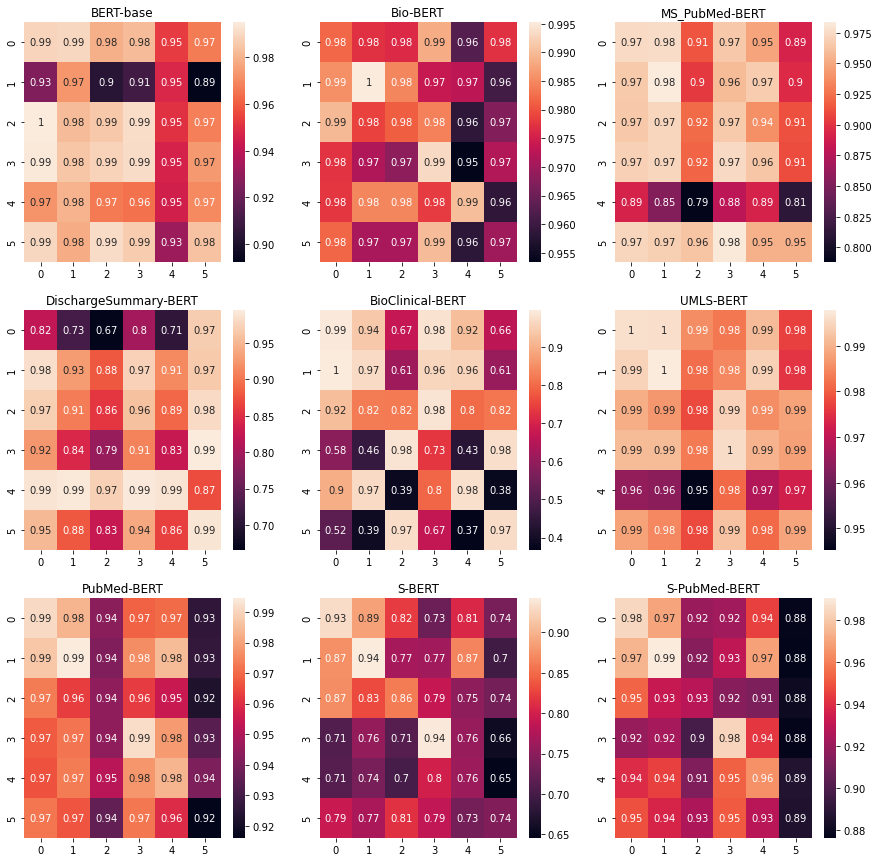

In [240]:
# Visualize all cross-distance matrix for {Phrase, Description} pairs
fig, axes = plt.subplots(3,3, figsize=(15,15))
for hgm,axi in zip(encoder_word_models + sentence_encoder_models, axes.flatten()):
    sns.heatmap(cross_dist_mat_phrs_desc[hgm], annot=True, ax=axi)
    axi.set_title(hgm)

In [241]:
from matplotlib.patches import Rectangle

def plot_cross_dist_mats(dist_mat_dict, key, ax):
    sns.heatmap(dist_mat_dict[key], annot=True, ax=ax)
    ax.set_title(key)
    row_max = dist_mat_dict[key].argmax(axis=1)
    for row in range(len(row_max)):
        ax.add_patch(Rectangle((row_max[row], row), 1, 1, fill=False, edgecolor='green', lw=3))

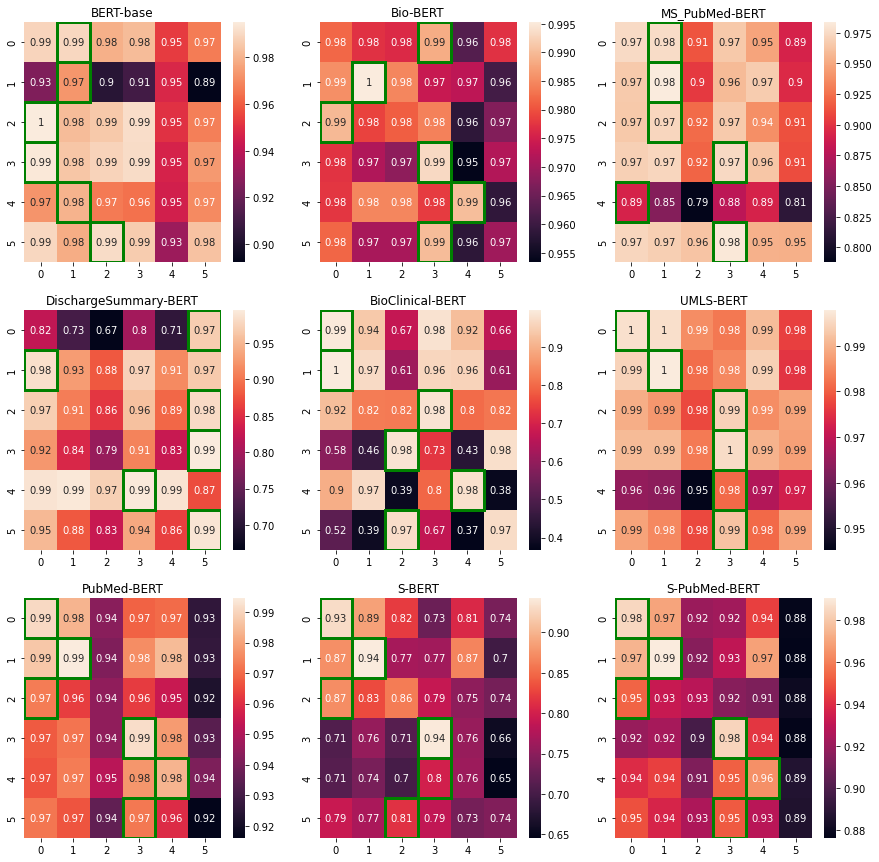

In [242]:
# Visualie all cross-distance matrix for {Phrase, Description} pairs, with max highlighted
fig, axes = plt.subplots(3,3, figsize=(15,15))
for hgm,axi in zip(encoder_word_models + sentence_encoder_models, axes.flatten()):
    plot_cross_dist_mats(cross_dist_mat_phrs_desc, hgm, axi)

In [243]:
similar_diagnoses_df.iloc[:,0:5]

,Sentence,Phrase,Codes,Description,Description_cleaned
0,"64-yrs-old came to emergency for increased sob, doe and light-headedness, echo showed ventricular systolic dysfunction, suggestive for acute systolic heart failure,",acute systolic heart failure,I50.21,Acute systolic (congestive) heart failure,Acute systolic heart failure
1,"77-yrs-old female with history of heart failure with reduced ejection fraction came to ED with chest pain and elevated Bp and pt is non-compliant with her heart failure medication, symptoms suggestive for the diagnosis of acute on chronic systolic heart failure.",acute on chronic systolic heart failure,I50.22,Acute on chronic systolic (congestive) heart failure,Acute on chronic systolic heart failure
2,"57-yrs-old male came to ED with lower extremity edema and increased fatigue, went for cardiac catheterisation and diagnosed with systolic heart failure.",systolic heart failure,I50.20,Unspecified systolic (congestive) heart failure,systolic heart failure
3,"79-yrs-old male came to ED on this morning for doe and irregular heartbeat, past medical hx includes htn, hld, gerd and diastolic dysfunction, previous and current ejection fraction remains same 60-65%,which is suggestive of chronic diastolic heart failure.",chronic diastolic heart failure,I50.32,Chronic diastolic (congestive) heart failure,Chronic diastolic heart failure
4,"42-yrs-old Caucasian female with hx of chronic combined systolic and diastolic heart failure admitted to ed yesterday night with complaints breathlessness, severe chest pain and weakness ,urgently went for cardiac catheterisation and underwent PCI with two drug eluting stents placed in the proximal LAD due to exacerbation of his chronic combined systolic and diastolic heart failure",exacerbation of his chronic combined systolic and diastolic heart failure,I50.43,Acute on chronic combined systolic (congestive) and diastolic (congestive) heart failure,Acute on chronic combined systolic and diastolic heart failure
5,"57-Yrs-old female with hx of multiple co-morbidities came to ED for chest pain, lower extremity edema and sob with family hx of heart failure ,bnp elevated and suggestive for congestive heart failure",congestive heart failure,I50.9,"Heart failure, unspecified",Heart failure


In [244]:
# Generate {Description_cleaned} embeddings for Encoder only models
for hgm in encoder_word_models:
    similar_diagnoses_df['Description_cleaned_' + hgm + '_embd'] = similar_diagnoses_df['Description_cleaned'].apply(lambda s: get_encoder_pooler_embedding(HG_model[hgm], HG_tokenizer[hgm], s))
similar_diagnoses_df.shape 

(6, 30)

In [245]:
# Generate {Description_cleaned} embeddings for "Sentence-Encoder" models
for hgm in sentence_encoder_models:
    similar_diagnoses_df['Description_cleaned_' + hgm + '_embd'] = similar_diagnoses_df['Description_cleaned'].apply(lambda s: get_sentence_encoder_embedding(HG_model[hgm], s))
similar_diagnoses_df.shape 

(6, 32)

In [246]:
# Create cross-distance matrix between : {Phrase, Description_cleaned}
cross_dist_mat_phrs_desc_clean = {}

for hgm in encoder_word_models + sentence_encoder_models:
    # With cleaned descriptions
    cross_dist_mat_phrs_desc_clean[hgm] = np_cos_cross_dist_mat(similar_diagnoses_df['Phrase_' + hgm + '_embd'].values, similar_diagnoses_df['Description_cleaned_' + hgm + '_embd'].values)

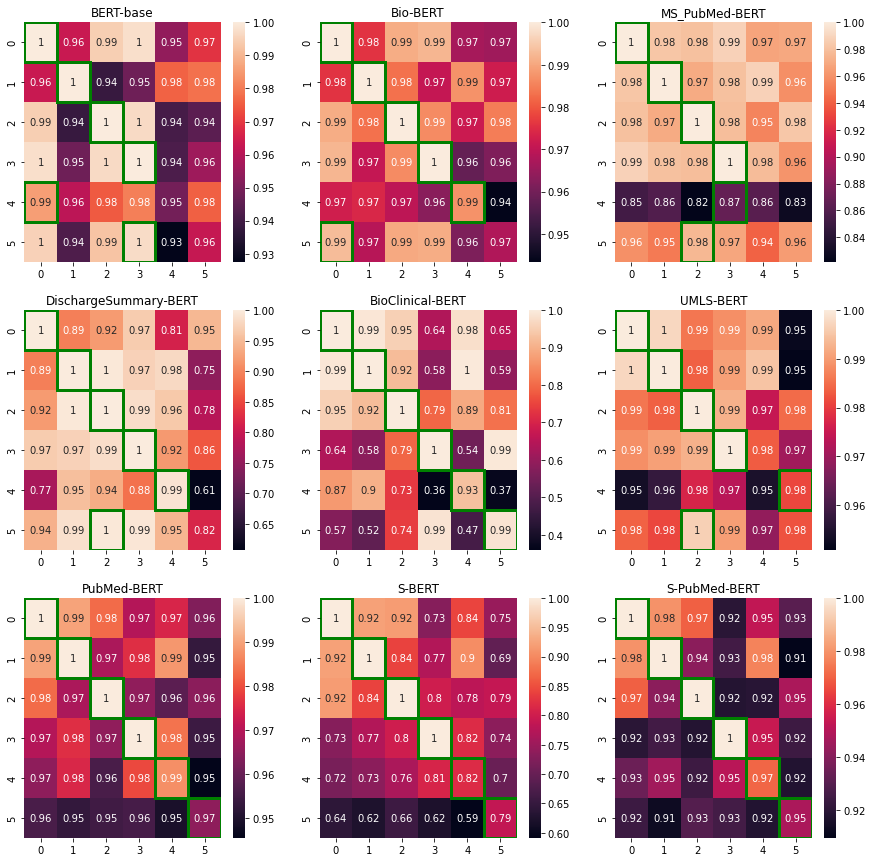

In [247]:
# Plot all cross-distance matrix for {Phrase, Description}
fig, axes = plt.subplots(3,3, figsize=(15,15))
for hgm,axi in zip(encoder_word_models + sentence_encoder_models, axes.flatten()):
    plot_cross_dist_mats(cross_dist_mat_phrs_desc_clean, hgm, axi)